In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def macd(df, fast=12, slow=26, signal=9):
    # 使用Pandas TA的macd函数
    macd_result = ta.macd(df['close'], fast=fast, slow=slow, signal=signal)
    return macd_result['MACD_12_26_9'].fillna(0)  # 返回MACD线

In [5]:
evaluator.set_factor(
    factor_data_or_func=macd,
    factor_name='macd'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.003092
   Rank_IC (Spearman): -0.028983
📊 信息比率:
   IR: -0.046513
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130650
   因子列: macd
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


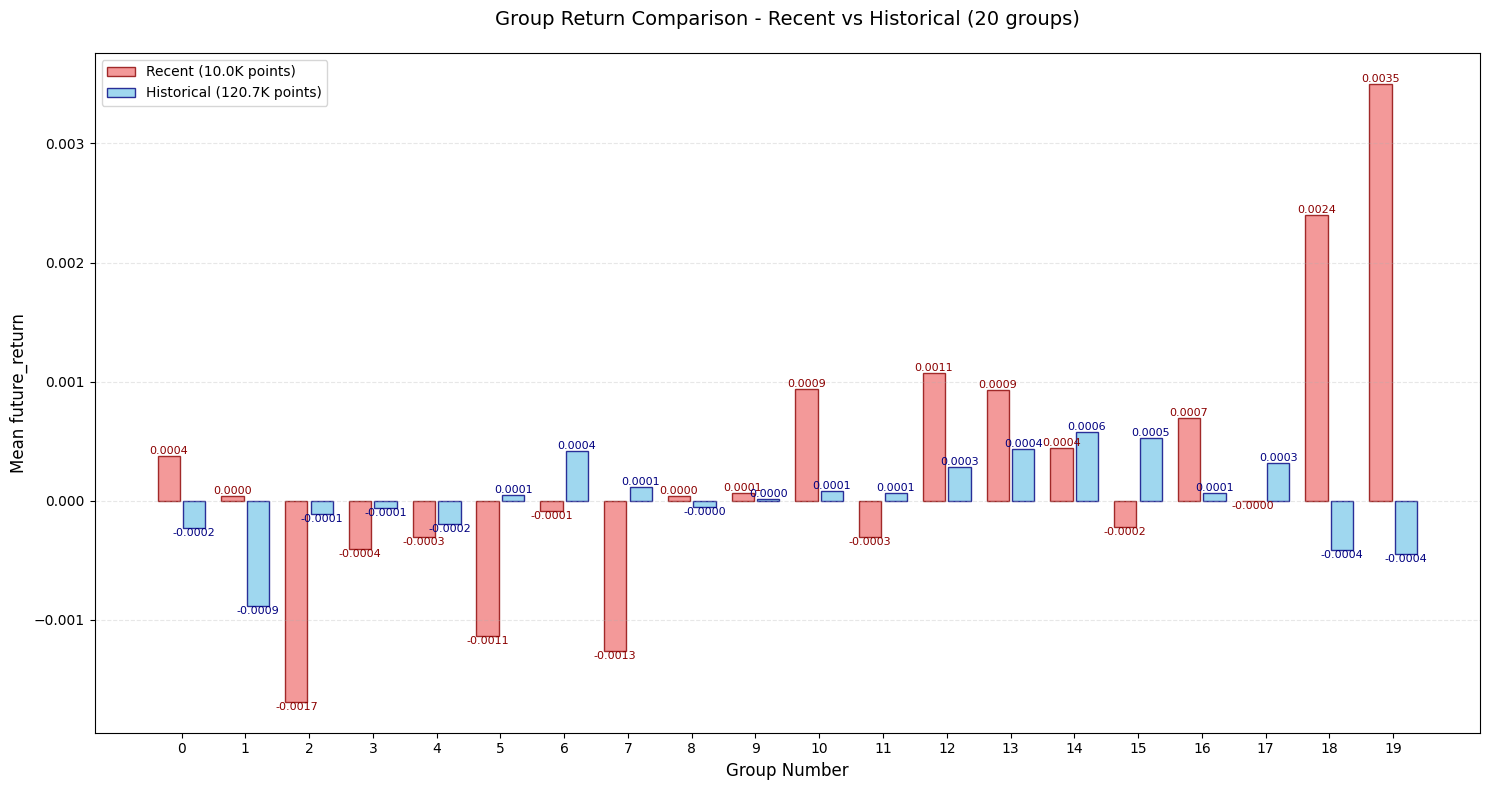

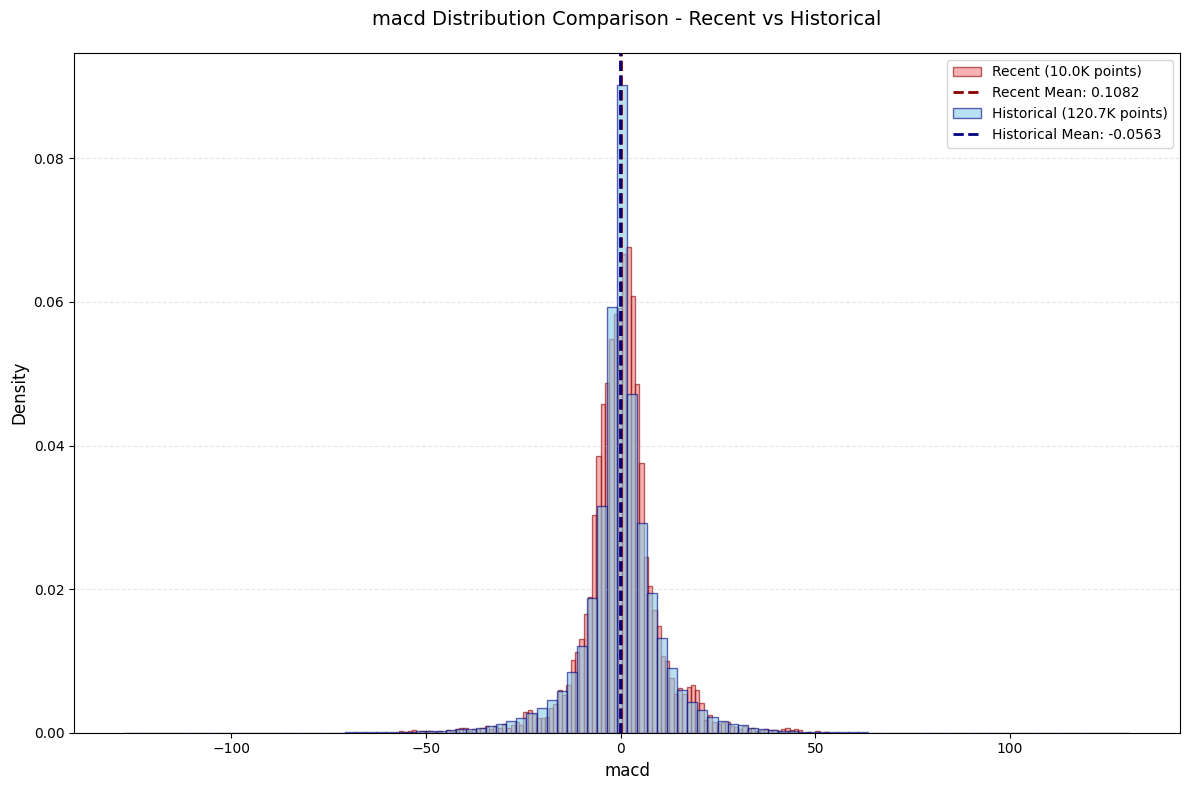

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)